In [229]:
import pandas as pd

In [230]:
data_folder = "data/"

price_files = [
    "prices_round_1_day_-2.csv",
    "prices_round_1_day_-1.csv",
    "prices_round_1_day_0.csv",
]

trade_files = [
    "trades_round_1_day_-2.csv",
    "trades_round_1_day_-1.csv",
    "trades_round_1_day_0.csv",
]

In [231]:
prices = pd.concat([
    pd.read_csv(data_folder + file, sep=';') 
    for file in price_files
])

trades = pd.concat([
    pd.read_csv(data_folder + file, sep=';')
    for file in trade_files
])

In [232]:
kelp_prices = prices[prices["product"] == "KELP"]
kelp_trades = trades[trades["symbol"] == "KELP"]

In [243]:
kelp_prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,KELP,1998,26,NaN,NaN,NaN,NaN,2002,26,NaN,NaN,NaN,NaN,2000.0,0.0
5,-2,100,KELP,2000,5,1999.0,6.0,1998.0,20.0,2002,20,NaN,NaN,NaN,NaN,2001.0,0.0
6,-2,200,KELP,1999,1,1998.0,30.0,NaN,NaN,2002,31,NaN,NaN,NaN,NaN,2000.5,0.0
10,-2,300,KELP,1999,27,NaN,NaN,NaN,NaN,2002,27,NaN,NaN,NaN,NaN,2000.5,0.0
13,-2,400,KELP,1999,20,NaN,NaN,NaN,NaN,2002,20,NaN,NaN,NaN,NaN,2000.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29987,0,999500,KELP,2032,28,NaN,NaN,NaN,NaN,2035,28,NaN,NaN,NaN,NaN,2033.5,0.0
29990,0,999600,KELP,2032,36,NaN,NaN,NaN,NaN,2035,29,NaN,NaN,NaN,NaN,2033.5,0.0
29991,0,999700,KELP,2034,1,2032.0,26.0,NaN,NaN,2035,26,NaN,NaN,NaN,NaN,2034.5,0.0
29995,0,999800,KELP,2032,27,NaN,NaN,NaN,NaN,2034,1,2035.0,27.0,NaN,NaN,2033.0,0.0


In [247]:
mid_prices = kelp_prices['mid_price'].to_numpy()

In [275]:
X = []

for i in range(29000):
    X.append([])
    for x in mid_prices[i:i+5]:
        X[-1].append(x)

y = [mid_prices[i + 5] for i in range(29000)]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = X[:20_000], X[20_000:], y[:20_000], y[20_000:]

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

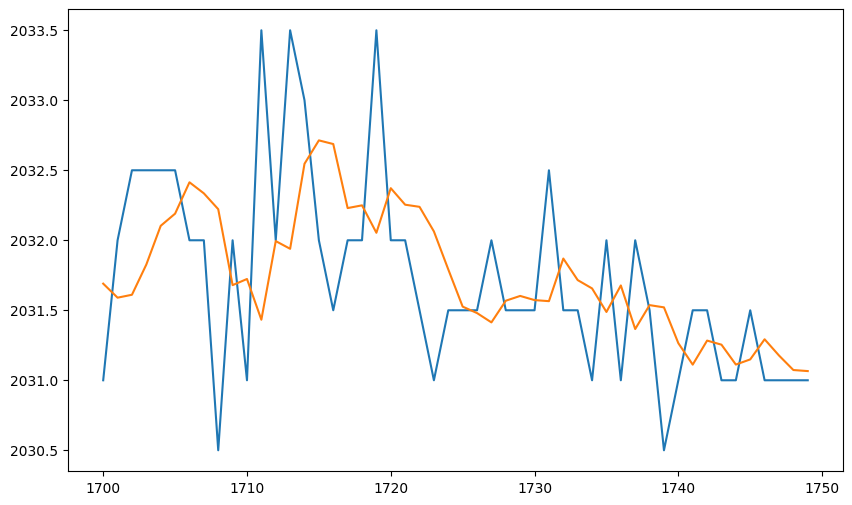

In [290]:
import matplotlib.pyplot as plt

start = 1700
end = start + 50

plt.figure(figsize=(10, 6))
plt.plot(range(start, end), y_test[start: end], label="actual")
plt.plot(range(start, end), y_pred[start: end], label="predicted")

In [277]:
mse

0.3950277310332459

In [284]:
y_test[1705:1740] - y_pred[1705:1740]

array([ 0.309799  , -0.41417178, -0.33519797, -1.72206294,  0.32045833,
       -0.72344716,  2.067463  ,  0.00583285,  1.56079839,  0.45358432,
       -0.71361341, -1.18741794, -0.22998268, -0.24951481,  1.44645966,
       -0.37209083, -0.25411336, -0.73893192, -1.0632149 , -0.29176959,
       -0.02608052,  0.01999516,  0.58651007, -0.06829056, -0.10245177,
       -0.07270063,  0.93485644, -0.36948032, -0.2155868 , -0.65608452,
        0.51207542, -0.67737148,  0.63397791, -0.03678459, -1.02082271])

In [285]:
lr.coef_

array([0.14814397, 0.15165363, 0.16676778, 0.22627006, 0.30609159])

In [287]:
lr.intercept_

np.float64(2.169063335177043)